In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('src\claims_train.csv')

df.drop('Area', axis=1, inplace=True)

df['BonusMalus']=df['BonusMalus']/100

df= df[df['Exposure']<=1]
df = df[(df['VehAge']<=25)]

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\bogda\AppData\Local\Temp\ipykernel_26348\252762646.py:5: SyntaxWarning: invalid escape sequence '\c'
  df=pd.read_csv('src\claims_train.csv')


In [3]:
age_avg = df[df['BonusMalus']>=0.95**(df['DrivAge']-18)].groupby('DrivAge')['BonusMalus'].mean()
df.loc[df['BonusMalus']<0.95**(df['DrivAge']-18), 'BonusMalus'] = df.loc[df['BonusMalus']<0.95**(df['DrivAge']-18), 'DrivAge'].map(age_avg)

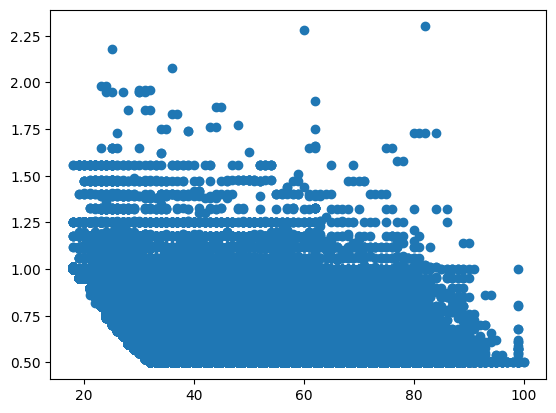

(539373, 11)


In [4]:
plt.scatter(df['DrivAge'],df['BonusMalus'])
plt.show()
print(df.shape)

In [5]:
alpha=10 # If we want to penaltize the claimnb more
beta=0 # If we want to finetune the exposure part 
df['Risk'] = (np.log(1+(df['ClaimNb']**alpha)/(df['Exposure']+beta))/(1+(np.log(1+(df['ClaimNb']**alpha)/(df['Exposure']+beta)))))

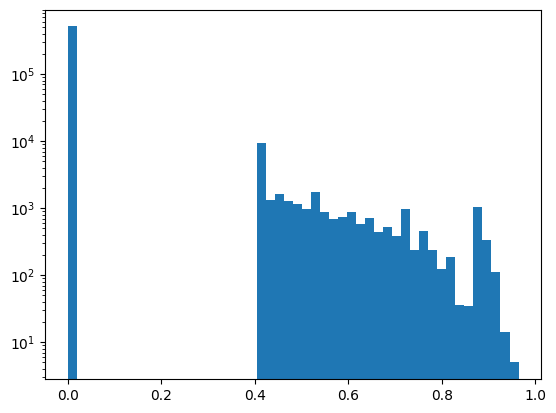

In [6]:
plt.hist(df['Risk'],50)
plt.yscale('log')
plt.show()

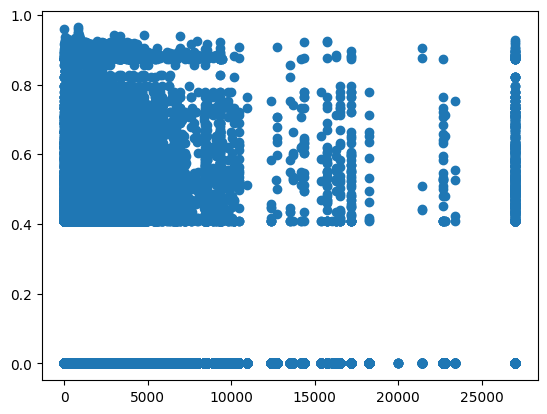

In [7]:
plt.scatter(df['Density'],df['Risk'])
plt.show()

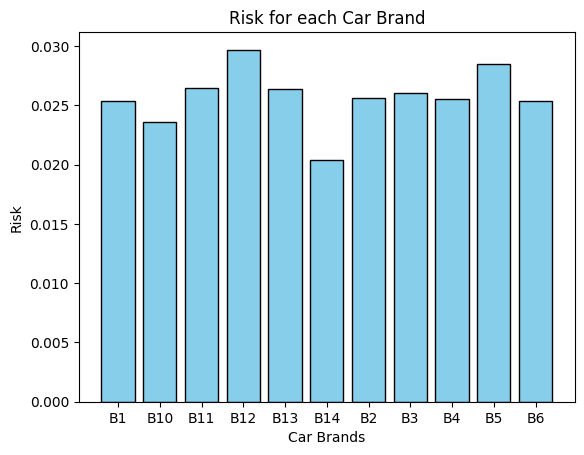

In [8]:
car_brands_risk = df.groupby('VehBrand')['Risk'].mean().to_dict()


plt.bar(list(car_brands_risk.keys()), list(car_brands_risk.values()), color='skyblue', edgecolor='black')

plt.xlabel("Car Brands")
plt.ylabel("Risk")
plt.title("Risk for each Car Brand")

plt.show()
